In [2]:
!pip install squarify

You should consider upgrading via the 'c:\users\eshan jairath\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
from collections import Counter
import pandas as pd
import numpy as np
import squarify
import seaborn as sns
from seaborn import axes_style
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.pyplot import xticks

%matplotlib inline

print('Libraries Imported !!')

Libraries Imported !!


In [10]:
netflix_df = pd.read_csv('./DataSets/netflix_titles_2021.csv')
print('Dataset imported ! ')

Dataset imported ! 


In [11]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
netflix_df.shape

(8807, 12)

In [13]:
# Show overview of columns that may have nulls
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
# A look at the basic stats for the release year
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [15]:
# Show the distinct types of media in the dataset
netflix_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

Now, to look into fields with NaN values

In [18]:
netflix_df[netflix_df.date_added.isna() == True].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."


### Prepping the Data

With an understanding of what is in the dataset, a copy will be made to transform the datset and preserve the original for future use.

In [19]:
netflix_df_copy = netflix_df

In [20]:
# Change date_added to datetime and assign to variable
netflix_df_copy['date_added'] = pd.to_datetime(netflix_df['date_added'])

#Extract year from date_added column
netflix_df_copy['year_added'] = pd.DatetimeIndex(netflix_df_copy.date_added).year
#Extract month from date_added column
netflix_df_copy['month_added'] = pd.DatetimeIndex(netflix_df_copy.date_added).month
#Extract day from date_added column
netflix_df_copy['day_added'] = pd.DatetimeIndex(netflix_df_copy.date_added).day

# Cast year's day_added to Int64 to catch NaN values
netflix_df_copy['year_added'] = netflix_df_copy['year_added'].astype('Int64')
# Cast month's day_added to Int64 to catch NaN values
netflix_df_copy['month_added'] = netflix_df_copy['month_added'].astype('Int64')
# Cast day's day_added to Int64 to catch NaN values
netflix_df_copy['day_added'] = netflix_df_copy['day_added'].astype('Int64')

In [21]:
netflix_df_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24


### Cleaning the Data

As shown prior, the ratings column has some problematic data (e.g., 'min') values and NaN values. Time to clean these up.

In [22]:
#Show rating rows with NaN
netflix_df_copy.loc[netflix_df_copy['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017,1,26
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016,12,1
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018,2,1
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017,3,1


In [23]:
#Replace Nan in rating column with Unknown
netflix_df_copy['rating'] = netflix_df_copy['rating'].fillna('Unknown')

As mentioned, the 'min' is supposed to be in the duration column, not the rating column. This data entry error will need to be fixed along with the NaNs, so that the duration column and rating column are consistent.

In [24]:
#Locate minute string values in rating
netflix_df_copy.loc[netflix_df_copy['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8,15


In [25]:
# Create copy of data frame in case dataframe is inaccessible
netflix_df_copy2 = netflix_df_copy

# Change duration to string data type to set up for Nan removal
netflix_df_copy2['duration'] = netflix_df_copy2['duration'].astype('string')

# Remove Nans in duration
netflix_df_copy2.loc[[5541, 5794, 5813]] = netflix_df_copy2.loc[[5541, 5794, 5813]].replace(np.nan, '')

In [26]:
# Examine to see if duration column has no NaN
netflix_df_copy2.loc[netflix_df_copy2['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,,Movies,The comic puts his trademark hilarious/thought...,2016,8,15


In [27]:
# Update data entry error rows to the correct duration values
netflix_df_copy2.at[5541, 'duration'] = '74 min'
netflix_df_copy2.at[5794, 'duration'] = '84 min'
netflix_df_copy2.at[5813, 'duration'] = '66 min'

In [28]:
# Update data entry errors (e.g., 'min') in rating column to 'Unknown'
for key, value in netflix_df_copy['rating'].items():
    if 'min' in value:
        netflix_df_copy2['rating'].replace([value], 'Unknown', regex= True, inplace= True)

In [29]:
# Now to check the dataframe for the changes made
netflix_df_copy2.loc[netflix_df_copy2['rating'].str.contains('Unknown')].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,8,15


### Exploratory Analysis and Vizualization

Before analysis can begin, an adjustment needs to be made to account for when Netfilx began streaming so that accurate calculations can be done since streaming started.

In [31]:
#Create a column for when streaming started
stream_start = 2007
netflix_df_copy['adjusted_release_year'] = stream_start

In [32]:
# Create a column for the difference between year added and release year
netflix_df_copy2['year(s)_to_acquisition'] = netflix_df_copy2['year_added'] - netflix_df_copy2['release_year']

In [33]:
# Assign any value in release year less than 2007 to a variable
stream_year = netflix_df_copy2['release_year'] < 2007

# For any stream year, the adjusted release year value will be subtracted from the year added value
netflix_df_copy2.loc[stream_year, 'year(s)_to_acquisition'] = netflix_df_copy2['year_added'] - netflix_df_copy2['adjusted_release_year']

In [34]:
# Create absolute values for year(s) to acquisition to remove negative values
netflix_df_copy2['year(s)_to_acquisition'] = netflix_df_copy2['year(s)_to_acquisition'].abs()

In [35]:
# Create Netflix acqusition of media dataframe
acq_df = netflix_df_copy2[['title', 'type', 'listed_in', 'duration', 'year_added', 'release_year', 'adjusted_release_year', 'year(s)_to_acquisition']]


In [36]:
#Calculate the average years to acqusition
acq_df['year(s)_to_acquisition'].mean().round(2)

3.28

In [37]:
#Minimum years until acquisition
acq_df['year(s)_to_acquisition'].min()

0

In [38]:
#Assign variable to minimum year
min_year = acq_df['year(s)_to_acquisition'].min() 

In [39]:
#Maximum years until acquisition
acq_df['year(s)_to_acquisition'].max()

14

In [40]:
#Assign variable to maximum year
max_year = acq_df['year(s)_to_acquisition'].max() 

Now, to split the data on media type to analyze on minimum year to acquisition for TV and movie titles

In [41]:
#Show Netflix titles that are TV related with zero year to acquisition
tv_acq_df = acq_df[acq_df['type'] == 'TV Show']

min_tv_df = tv_acq_df.loc[tv_acq_df['year(s)_to_acquisition'] == min_year]

In [42]:
#Show Netflix titles that are Movie related with zero year to acquisition
movie_acq_df = acq_df[acq_df['type'] == 'Movie']

min_movie_df = movie_acq_df.loc[movie_acq_df['year(s)_to_acquisition'] == min_year]

In [43]:
#Count how many Netflix titles are listed TV with zero years to acquisition
tv_acq_count = len(min_tv_df)

print(f'There are {tv_acq_count} content listed TV in Netflix titles aquired in less than a year.')

There are 1379 content listed TV in Netflix titles aquired in less than a year.


In [44]:
#Count how many Netflix titles are listed Movie with zero years to acquisition
movie_acq_count = len(min_movie_df)

print(f'There are {movie_acq_count} content listed movie in Netflix titles aquired in less than a year.')

There are 1862 content listed movie in Netflix titles aquired in less than a year.


In [45]:
#Separate TV Shows and Movies into dataframes
tv_media = netflix_df_copy2[netflix_df_copy2['type'] == 'TV Show']
movie_media = netflix_df_copy2[netflix_df_copy2['type'] == 'Movie']

In [46]:
tv_media.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,adjusted_release_year,year(s)_to_acquisition
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,2007,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,2007,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,2007,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,2007,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,2007,0


In [47]:
movie_media.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,adjusted_release_year,year(s)_to_acquisition
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,2007,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,2007,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,2007,14
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24,2007,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23,2007,0


In [48]:
#View the count of tv shows per rating
tv_media['rating'].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
Unknown        2
TV-Y7-FV       1
Name: rating, dtype: int64

In [49]:
#View the count of movie per rating
movie_media['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
Unknown        5
UR             3
NC-17          3
Name: rating, dtype: int64

In [50]:
# Confirm total TV Show in tv media content
tv_media_count = len(tv_media['year(s)_to_acquisition'])

In [51]:
tv_media_count

2676

In [52]:
# Confirm total TV Shows added in less than a year
tv_acq_count

1379

In [53]:
# Divide the TV content added in less than a year by the total TV media content
result = tv_acq_count/tv_media_count

print('{:.0%} of the TV shows acquired were in less than a year.'.format(result))

52% of the TV shows acquired were in less than a year.


In [54]:
# Removing NaN values for plotting
tv_media_nonull = tv_media['year(s)_to_acquisition'][~np.isnan(tv_media['year(s)_to_acquisition'])]

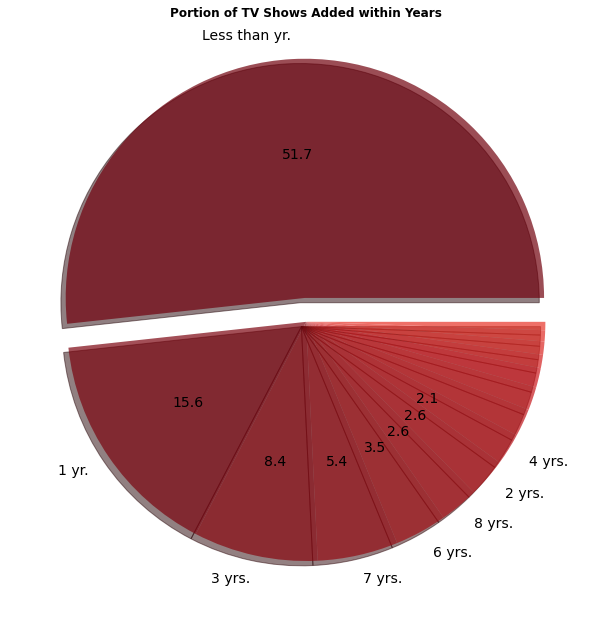

In [55]:
# Plotting the TV media content to show the portion of TV media added through a yearly time frame
fig1, ax1 = plt.subplots(figsize=(14, 11))

thin_width = 0.03
n_lst = tv_media_nonull.value_counts()

m_labels = [ 'Less than yr.',  '1 yr.',  '3 yrs.',  '7 yrs.',  '6 yrs.',  '8 yrs.',  '2 yrs.',  '4 yrs.',  '5 yrs.',  '9 yrs.', '12 yrs.', 
            '10 yrs.', '13 yrs.', '11 yrs.', '14 yrs.']

explode1 = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

color1 = sns.color_palette('Reds_r', n_colors= 42)

wedges, texts, autotexts = ax1.pie(n_lst, labels = m_labels, shadow = True, colors = color1, explode= explode1, 
                                   autopct= lambda pct:"{:.1f}".format(pct), textprops= {'fontsize': 14}, wedgeprops= {'alpha': 0.7})

ax1.set_title('Portion of TV Shows Added within Years', fontweight = 'bold')

# Drop the label of portion added if the value is 2 or less
dropoff = 2
for mlabel, perc_label in zip(texts, autotexts):
    perc_val = perc_label.get_text().rstrip('%')
    if float(perc_val) < dropoff:
        mlabel.set_text('')
        perc_label.set_text('')

In [56]:
# Confirm total movies in movie media content
movie_media_count = len(movie_media['year(s)_to_acquisition'])

In [57]:
movie_media_count

6131

In [58]:
# Divide the movies added in less than a year by the total movie media content
result = movie_acq_count/movie_media_count

print('{:.0%} of movies acquired were in less than a year.'.format(result))

30% of movies acquired were in less than a year.


In [59]:
# Removing NaN values for plotting
movie_media_nonull = movie_media['year(s)_to_acquisition'][~np.isnan(movie_media['year(s)_to_acquisition'])]

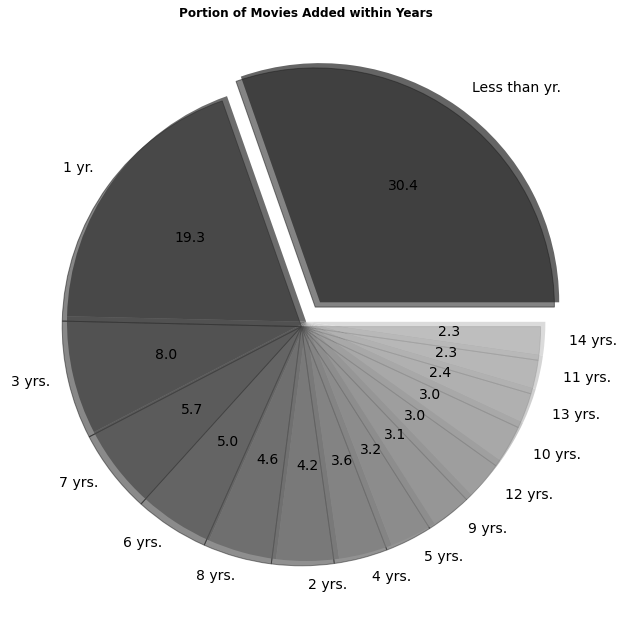

In [60]:
fig1, ax1 = plt.subplots(figsize=(14, 11))

thin_width = 0.03
n_lst = movie_media_nonull.value_counts()

m_labels = [ 'Less than yr.',  '1 yr.',  '3 yrs.',  '7 yrs.',  '6 yrs.',  '8 yrs.',  '2 yrs.',  '4 yrs.',  '5 yrs.',  '9 yrs.', '12 yrs.', 
            '10 yrs.', '13 yrs.', '11 yrs.', '14 yrs.']

explode1 = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

color1 = sns.color_palette('RdGy_r', n_colors= 42)

wedges, texts, autotexts = ax1.pie(n_lst, labels = m_labels, shadow = True, colors = color1, explode= explode1, 
                                   autopct= lambda pct:"{:.1f}".format(pct), textprops= {'fontsize': 14}, wedgeprops= {'alpha': 0.7})

ax1.set_title('Portion of Movies Added within Years', fontweight = 'bold');


In [61]:
#Assign tv ratings and number of ratings to variables
rating = tv_media['rating']
tv_shows = tv_media['rating'].value_counts()

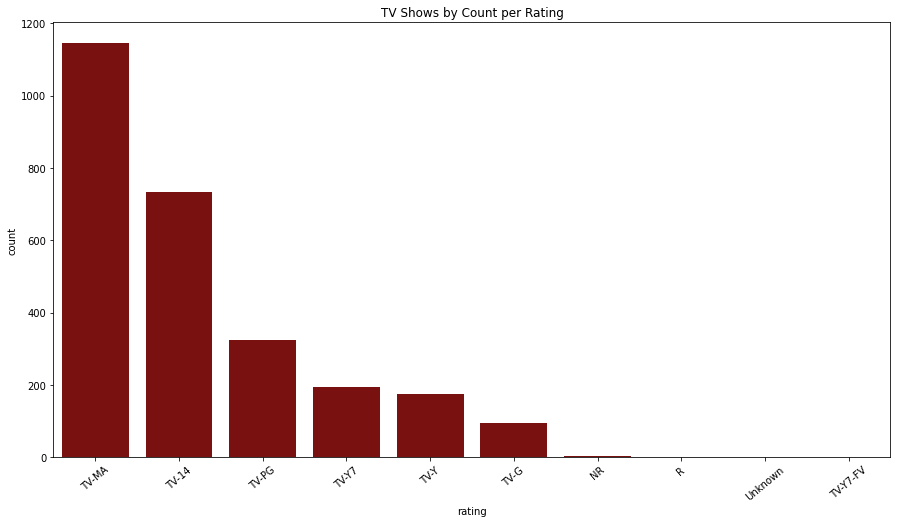

In [62]:
#Create a barplot for tv ratings
plt.figure(figsize= (15, 8))
sns.countplot(x= 'rating', data= tv_media, 
              color= 'darkred', 
              order= tv_media['rating']. value_counts().index).set(title = 'TV Shows by Count per Rating')

ax = sns.countplot(x= 'rating', data= tv_media,
                   color= 'darkred',
                   order= tv_media['rating']. value_counts().index)

xticks(rotation = 40);

In [63]:
#Assign movie ratings and number of ratings to variables
rating = movie_media['rating']
movies = movie_media['rating'].value_counts()

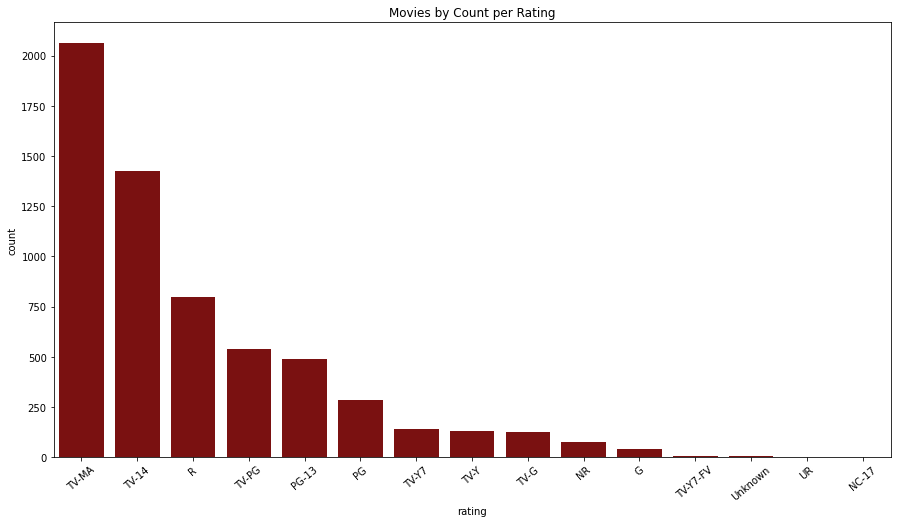

In [64]:
#Create a barplot for movie ratings
plt.figure(figsize= (15, 8))
sns.countplot(x= 'rating', data= movie_media, 
              color= 'darkred', 
              order= movie_media['rating']. value_counts().index).set(title = 'Movies by Count per Rating')

ax = sns.countplot(x= 'rating', data= movie_media,
                   color= 'darkred',
                   order= movie_media['rating']. value_counts().index)

xticks(rotation = 40);

In [65]:
tv_media['country']

1                                        South Africa
2                                                 NaN
3                                                 NaN
4                                               India
5                                                 NaN
                            ...                      
8795                                    Japan, Canada
8796                                           Turkey
8797    United States, France, South Korea, Indonesia
8800                                         Pakistan
8803                                              NaN
Name: country, Length: 2676, dtype: object

In [66]:
tv_media['country'].isna().sum()

391

In [67]:
# Cleaning country data of NaNs
country_tv_media = tv_media['country'].fillna('Null')

# Separate out the countries by joining the countries into a string and using the comma as a separator, 
# replacing the comma and space with just a comma, and then splitting on the comma so items are contained in the Counter
country_tv_media_count = pd.Series(Counter(','.join(country_tv_media).replace(', ', ',').split(',')))
# Drop the Nulls from the Series
country_tv_media_clean = country_tv_media_count.drop(['Null'], axis= 0)
# Sort the countries descendig by the Counter
country_tv_media_sort = country_tv_media_clean.sort_values(ascending= False)

In [68]:
# Aggregate the overall total without Nulls
total_tv = sum(country_tv_media_sort)
# Aggregate totals for the top 10
top_ten = sum(country_tv_media_sort.head(10))
# et the top 10 countries
top_ten_countries = country_tv_media_sort.head(10) 

In [69]:
top_ten_countries

United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
dtype: int64

In [70]:
print(f'The total TV shows is {total_tv}')
print(f'The total TV shows of the top ten is {top_ten}')

The total TV shows is 2640
The total TV shows of the top ten is 2076


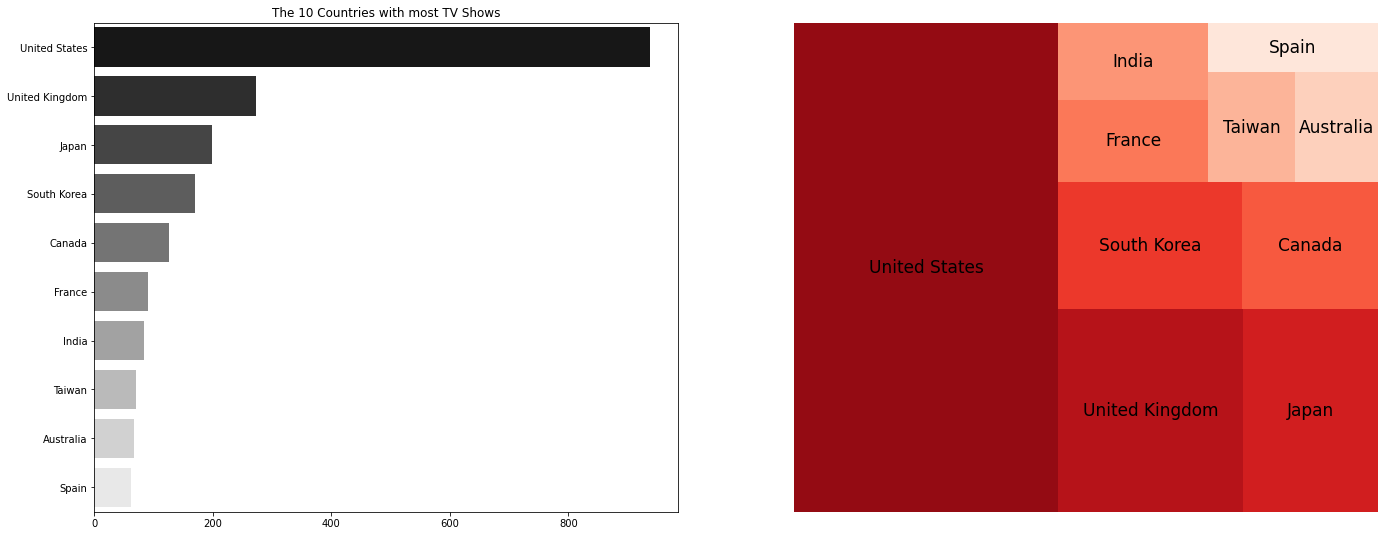

In [71]:
fig = plt.figure(figsize= (23, 9))
gridsp = gridspec.GridSpec(nrows= 1, ncols= 2)

# Plotting a barplot
ax1 = plt.subplot(gridsp[0])
sns.barplot(x= top_ten_countries.values, y= top_ten_countries.index, ax = ax1, palette = 'gray')

ax1.set_title('The 10 Countries with most TV Shows')

# Plotting a treemap
ax2 = plt.subplot(gridsp[1])
y_axis = top_ten_countries
squarify.plot(sizes= y_axis.values, label= y_axis.index, color= sns.color_palette('Reds_r', n_colors= 10), linewidth = 3,
             text_kwargs={'fontsize': 17})
plt.axis('off');

In [72]:
yearly_content = netflix_df_copy2

In [73]:
yearly_content['year_added'].min()

2008

In [74]:
# Grouping the data to aggregate the titles added in that respective year
grouped_content = yearly_content.groupby('year_added', as_index=False).count()

In [75]:
grouped_content[['year_added', 'show_id']]

,year_added,show_id
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


In [76]:
yearly_content = grouped_content[['year_added', 'show_id']]

In [77]:
max_content = yearly_content['show_id'].max()

In [78]:
# Identifying the year with the most content added
yearly_content.loc[yearly_content['show_id'] == max_content]

,year_added,show_id
11,2019,2016


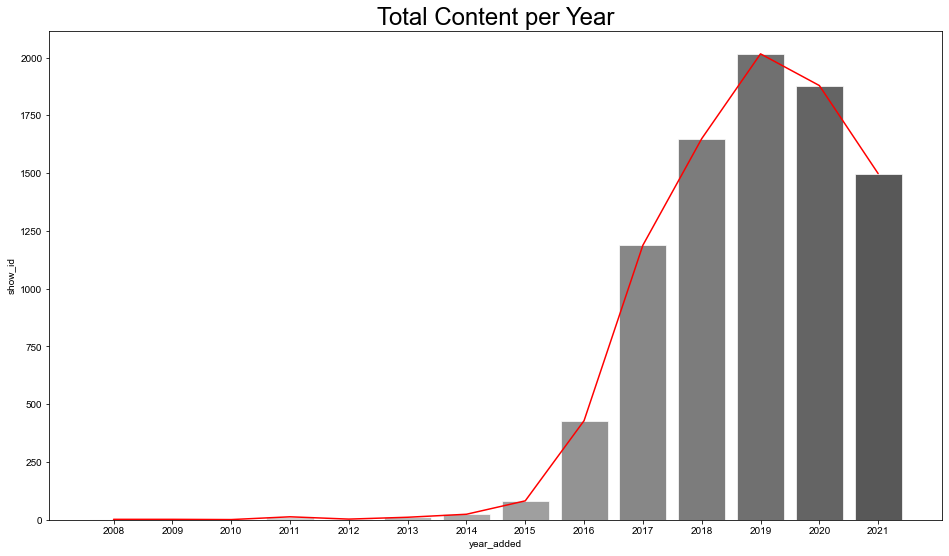

In [79]:
fig, ax = plt.subplots(figsize= (16,9))
ax.set_title('Total Content per Year', fontdict= { 'fontsize': 24})
sns.set_style('whitegrid')
sns.barplot(data= yearly_content, x= 'year_added', y= 'show_id', palette= 'gray_r', ax= ax, alpha= 0.7)
sns.lineplot(x= np.arange(0,len(yearly_content.year_added)), y= yearly_content.show_id, hue= None, color= 'Red', ax= ax);

# Conclusions and Inference of the Data

When comparing TV to movie content in the dataset, A higher portion of TV and movies were added in less than a year to the platform. Among those portions, TV shows had a larger portion than movies, even though there were more movies acquired than TV shows. There is more mature rated content among movies than TV shows, and most of the content is in the United States with the United Kingdom and Japan following. From 2008 to 2021, there was a steady increase of content added, with a spike in content happening in 2019. The spike might be due to the adding of more newer original TV shows and movies. 